# ex02_吴倩茵

# 上市公司财务特征分析  
**姓名：** 吴倩茵  
**学号：** 24210170  

**分析任务：**  
**A . 列表呈现如下指标在 2000-今 期间各个年度的 平均值，中位数，标准差，最小值 和 最大值，并作简要分析。（需要对离群值进行处理）**
* Lev = 总负债率 = 总负债/总资产
* SL = 流动负债率 = 流动负债/总资产
* LL = 长期负债率 = 长期负债/总资产
* SDR = 短债比率 = 流动负债/总负债
* Cash = 现金比率 = 公司年末持有的现金和现金等价物/总资产
* ROA = 净利润/总资产
* ROE = 净利润/净资产
* SLoan = 短期银行借款/总资产
* LLoan = 长期银行借款/总资产
* Top1 = 第一大股东持股比例
* HHI5 = 前五大股东持股比例平方之和 (赫芬达尔指数)
* Size = ln(总资产)
* Age = 公司上市年限  

**B. 绘制时序图并作简要分析：**  
* B1. 横轴为 年份，纵轴为 Lev 的均值和中位数。
* B2. 横轴为 年份，纵轴为 ROA 和 Cash 的均值 (若有必要可以考虑使用两个纵坐标)。  
  
**C. 负债率的行业特征分析**
* 待分析的行业： 制造业 (C)，电力、热力、燃气及水生产和供应业 (D)，交通运输业 (G)，建筑业 (E)，房地产业 (K)，批发和零售业 (F) 以及 金融业 (J)
    * 算数平均负债率时序图：绘制上述行业在自 2000 年至今各个年度的 年平均负债率 (Lev) 的时序图，并做简要分析。
    * 加权平均负债率时序图：绘制上述行业在自 2000 年至今各个年度的 年加权平均负债率 (Lev) 的时序图，并做简要分析。Note: 权重可以选择行业内每家公司的总资产；也可以选择行业内每家公司的总市值。
    * 简要分析上述两种算法的差别。它们的时序图有何差异？哪一种算法更合理？
* 列表。呈现上述行业在 2001，2003，... 年度上的如下变量的平均值，并作简要分析：
    * SLoan, LLoan, Lev
    * Cash, ROA, ROE  

**D. 股权结构分析**  
* 绘制箱线图。
    * 横轴为 年份，纵轴为 Top1 的值。年份取值为：{2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023}。
* 分析：2005 年，2007 年和 2023 年的箱线图有何区别？原因何在？

## 一、理清所需数据

**目的：** 为了梳理所需数据的来源哪个原始数据表，方便做数据处理
| 变量    |   来源   |  变量    |    来源    |
|-------|---------|---------|---------|
|  证券代码 | asset_debt_2010 | 股票简称|  asset_debt_2010  |
|  总资产（元）  | asset_debt_2010/asset_debt_2024| 总负债（元）  | asset_debt_2010/asset_debt_2024   |
| 流动负债（元）  | asset_debt_2010/asset_debt_2024  | 长期负债（元） | asset_debt_2010/asset_debt_2024  |
| 短期银行借款（元）  | asset_debt_2010/asset_debt_2024   | 长期银行借款（元）| asset_debt_2010/asset_debt_2024  |
| 公司年末持有的现金和现金等价物（元） | cash_flow_2010/cash_flow_2024 | 净利润（元）  | cash_flow_2010/cash_flow_2024 |
| 第一大股东比例（%）  |  常用变量查询（年度）  |HHI5（%） | 常用变量查询（年度）   |
|行业| STK_LISTEDCOINFOANL  |净资产（元）  | 计算指标：总资产-总负债   |
|时间| 2000-2024  | Age  | 计算指标：时间-上市年份   |

**备注：** 由于证券代码和股票简称所有原始表都有，选取其中一个较全的证券代码asset_debt_2010作为来源

  


## 二、数据提取与清洗
**目的：** 将所有所需的变量及数据从各个原始数据表提取，便于后续的数据提取以及分析

### Step 1: 提取「asset_debt」表中的变量，并增加'净资产'变量

In [40]:
import pandas as pd
import warnings

# 忽略openpyxl的样式警告
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# 读取数据
df_2010 = pd.read_excel('data_raw/asset_debt_2010.xlsx', dtype={'证券代码': str})
df_2024 = pd.read_excel('data_raw/asset_debt_2024.xlsx', dtype={'证券代码': str})

# 需要提取的列名（请根据实际表头调整字段名）
cols = [
    '证券代码', '时间', 
    '资产总计', '负债合计', '流动负债合计', 
    '长期负债合计', '短期借款', '长期借款', '上市日期'
]

# 提取所需列
df_2010_sel = df_2010[cols].copy()
df_2024_sel = df_2024[cols].copy()

# 提取上市日期的年份
df_2010_sel['上市年份'] = pd.to_datetime(df_2010_sel['上市日期'], errors='coerce').dt.year
df_2024_sel['上市年份'] = pd.to_datetime(df_2024_sel['上市日期'], errors='coerce').dt.year

# 新增Age列
df_2010_sel['Age'] = df_2010_sel.apply(
    lambda row: max(0, row['时间'] - row['上市年份']) if pd.notnull(row['上市年份']) and row['上市年份'] <= row['时间'] else 0, axis=1)
df_2024_sel['Age'] = df_2024_sel.apply(
    lambda row: max(0, row['时间'] - row['上市年份']) if pd.notnull(row['上市年份']) and row['上市年份'] <= row['时间'] else 0, axis=1)

# 合并两个表
stock_list = pd.concat([df_2010_sel, df_2024_sel], ignore_index=True)

# 保存结果
stock_list.to_csv('data_clean/stock_list.csv', index=False)

# 删除不需要的列
stock_list.drop(columns=['上市日期'], inplace=True)

# 重命名列
stock_list.rename(columns={
    '时间': '时间',
    '证券代码': '证券代码',
    '上市年份': '上市年份',
    '资产总计': '总资产',
    '负债合计': '总负债',
    '流动负债合计': '流动负债',
    '长期负债合计': '长期负债',
    '短期借款': '短期银行借款',
    '长期借款': '长期银行借款',
    'Age': 'Age'
}, inplace=True)

# 增加列
stock_list['净资产'] = stock_list['总资产'] - stock_list['总负债']

# 调整列顺序
stock_list = stock_list[['时间','证券代码',  '上市年份','总资产', '总负债', '流动负债', '长期负债', '短期银行借款', '长期银行借款', '净资产' ,'Age']]

# 保存结果
stock_list.to_csv('data_clean/stock_list.csv', index=False)

stock_list.head()


,时间,证券代码,上市年份,总资产,总负债,流动负债,长期负债,短期银行借款,长期银行借款,净资产,Age
0,2000,000001,1991,6.722750e+10,6.248862e+10,NaN,NaN,NaN,NaN,4.738884e+09,9
1,2000,000002,1991,5.622247e+09,2.656602e+09,2.532706e+09,8.000000e+07,5.660000e+08,8.000000e+07,2.965645e+09,9
2,2000,000003,1991,2.494446e+09,2.993068e+09,2.700269e+09,2.272581e+08,1.231221e+09,3.029221e+07,-4.986225e+08,9
3,2000,000004,1991,5.082067e+08,3.873043e+08,3.873043e+08,0.000000e+00,2.212000e+08,0.000000e+00,1.209024e+08,9
4,2000,000005,1990,2.020667e+09,1.179766e+09,1.016766e+09,1.630000e+08,7.188614e+08,1.630000e+08,8.409006e+08,10


### Step 2: 从「cash_flow」表中提取相关变量

In [41]:
# 读取现金流量表
cf_2010 = pd.read_excel('data_raw/cash_flow_2010.xlsx', dtype={'证券代码': str})
cf_2024 = pd.read_excel('data_raw/cash_flow_2024.xlsx', dtype={'证券代码': str})

# 需要提取的列名（请根据实际表头调整字段名）
cf_cols = ['证券代码', '时间', '净利润', '期末现金及现金等价物余额']

# 提取所需列
cf_2010_sel = cf_2010[cf_cols]
cf_2024_sel = cf_2024[cf_cols]

# 合并两个表
cf_all = pd.concat([cf_2010_sel, cf_2024_sel], ignore_index=True)

# 重命名列
cf_all = cf_all.rename(columns={'期末现金及现金等价物余额': '公司年末持有的现金和现金等价物'})

# 合并到stock_list
stock_list = pd.merge(
    stock_list,
    cf_all,
    on=['证券代码', '时间'],
    how='left'
)

# 保存结果
stock_list.to_csv('data_clean/stock_list.csv', index=False)

# 展示前几行
stock_list.head()

,时间,证券代码,上市年份,总资产,总负债,流动负债,长期负债,短期银行借款,长期银行借款,净资产,Age,净利润,公司年末持有的现金和现金等价物
0,2000,000001,1991,6.722750e+10,6.248862e+10,NaN,NaN,NaN,NaN,4.738884e+09,9,5.065518e+08,7.624793e+09
1,2000,000002,1991,5.622247e+09,2.656602e+09,2.532706e+09,8.000000e+07,5.660000e+08,8.000000e+07,2.965645e+09,9,3.111773e+08,9.957452e+08
2,2000,000003,1991,2.494446e+09,2.993068e+09,2.700269e+09,2.272581e+08,1.231221e+09,3.029221e+07,-4.986225e+08,9,-5.986632e+08,5.801817e+07
3,2000,000004,1991,5.082067e+08,3.873043e+08,3.873043e+08,0.000000e+00,2.212000e+08,0.000000e+00,1.209024e+08,9,2.248743e+07,6.478023e+07
4,2000,000005,1990,2.020667e+09,1.179766e+09,1.016766e+09,1.630000e+08,7.188614e+08,1.630000e+08,8.409006e+08,10,-9.311870e+06,2.911805e+07


### Step 3: 从「常用变量查询（年度）」表中提取相关变量

In [42]:
# 读取常用变量查询（年度）表
common_vars = pd.read_excel('data_raw/常用变量查询（年度）.xlsx', dtype={'证券代码': str})

# 调整列名
common_vars.rename(columns={'股票代码': '证券代码', '会计年度': '时间'}, inplace=True)

# 需要提取的列名（请根据实际表头调整字段名）
common_cols = ['证券代码', '时间', '股权集中度1', '股权集中度9']

# 提取所需列
common_sel = common_vars[common_cols]

# 重命名列
common_sel = common_sel.rename(columns={'股权集中度1': 'Top1', '股权集中度9': 'HHI5'})

# Ensure both columns have the same data type
stock_list['证券代码'] = stock_list['证券代码'].astype(str)
common_sel['证券代码'] = common_sel['证券代码'].astype(str)

# Merge the dataframes
stock_list = pd.merge(
    stock_list,
    common_sel,
    on=['证券代码', '时间'],
    how='left'
)

# 保存结果
stock_list.to_csv('data_clean/stock_list.csv', index=False)

# 展示前几行
stock_list.head()

,时间,证券代码,上市年份,总资产,总负债,流动负债,长期负债,短期银行借款,长期银行借款,净资产,Age,净利润,公司年末持有的现金和现金等价物,Top1,HHI5
0,2000,000001,1991,6.722750e+10,6.248862e+10,NaN,NaN,NaN,NaN,4.738884e+09,9,5.065518e+08,7.624793e+09,NaN,NaN
1,2000,000002,1991,5.622247e+09,2.656602e+09,2.532706e+09,8.000000e+07,5.660000e+08,8.000000e+07,2.965645e+09,9,3.111773e+08,9.957452e+08,NaN,NaN
2,2000,000003,1991,2.494446e+09,2.993068e+09,2.700269e+09,2.272581e+08,1.231221e+09,3.029221e+07,-4.986225e+08,9,-5.986632e+08,5.801817e+07,NaN,NaN
3,2000,000004,1991,5.082067e+08,3.873043e+08,3.873043e+08,0.000000e+00,2.212000e+08,0.000000e+00,1.209024e+08,9,2.248743e+07,6.478023e+07,NaN,NaN
4,2000,000005,1990,2.020667e+09,1.179766e+09,1.016766e+09,1.630000e+08,7.188614e+08,1.630000e+08,8.409006e+08,10,-9.311870e+06,2.911805e+07,NaN,NaN


### Step 4: 从「STK_LISTEDCOINFOANL」表中提取相关变量
由于原始表中存在多个行业代码，根据目前行业分类标准，此处统一使用 [行业代码D] - 中国上市公司协会行业分类代码

In [43]:
# 读取基本信息表
info = pd.read_excel('data_raw/STK_LISTEDCOINFOANL.xlsx', dtype={'证券代码': str})

# 需要提取的列名（请根据实际表头调整字段名）
info_cols = ['证券代码', '时间', '行业代码D']

# 提取所需列
info_sel = info[info_cols]

# 重命名列
info_sel = info_sel.rename(columns={'行业代码D': '行业代码'})

# 合并到stock_list
stock_list = pd.merge(
    stock_list,
    info_sel,
    on=['证券代码', '时间'],
    how='left'
)

# 保存结果
stock_list.to_csv('data_clean/stock_list.csv', index=False)

# 展示前几行
stock_list.head()

,时间,证券代码,上市年份,总资产,总负债,流动负债,长期负债,短期银行借款,长期银行借款,净资产,Age,净利润,公司年末持有的现金和现金等价物,Top1,HHI5,行业代码
0,2000,000001,1991,6.722750e+10,6.248862e+10,NaN,NaN,NaN,NaN,4.738884e+09,9,5.065518e+08,7.624793e+09,NaN,NaN,J66
1,2000,000002,1991,5.622247e+09,2.656602e+09,2.532706e+09,8.000000e+07,5.660000e+08,8.000000e+07,2.965645e+09,9,3.111773e+08,9.957452e+08,NaN,NaN,K70
2,2000,000003,1991,2.494446e+09,2.993068e+09,2.700269e+09,2.272581e+08,1.231221e+09,3.029221e+07,-4.986225e+08,9,-5.986632e+08,5.801817e+07,NaN,NaN,S91
3,2000,000004,1991,5.082067e+08,3.873043e+08,3.873043e+08,0.000000e+00,2.212000e+08,0.000000e+00,1.209024e+08,9,2.248743e+07,6.478023e+07,NaN,NaN,G54
4,2000,000005,1990,2.020667e+09,1.179766e+09,1.016766e+09,1.630000e+08,7.188614e+08,1.630000e+08,8.409006e+08,10,-9.311870e+06,2.911805e+07,NaN,NaN,S91


### Step 5: 针对多个缺失值的记录进行删除

In [44]:
# 复制stock_list为stock_list_clean
stock_list_clean = stock_list.copy()
# 删除总资产、总负债、流动负债、长期负债、短期银行借款、长期银行借款均为缺失值的记录
stock_list_clean = stock_list_clean.dropna(subset=['总资产', '总负债', '流动负债', '长期负债', '短期银行借款', '长期银行借款'], how='all')


# 检查结果
print(stock_list.head())

stock_list_clean.to_csv('data_clean/stock_list_clean.csv', index=False)

     时间    证券代码  上市年份           总资产           总负债          流动负债          长期负债  \
0  2000  000001  1991  6.722750e+10  6.248862e+10           NaN           NaN   
1  2000  000002  1991  5.622247e+09  2.656602e+09  2.532706e+09  8.000000e+07   
2  2000  000003  1991  2.494446e+09  2.993068e+09  2.700269e+09  2.272581e+08   
3  2000  000004  1991  5.082067e+08  3.873043e+08  3.873043e+08  0.000000e+00   
4  2000  000005  1990  2.020667e+09  1.179766e+09  1.016766e+09  1.630000e+08   

         短期银行借款        长期银行借款           净资产  Age           净利润  \
0           NaN           NaN  4.738884e+09    9  5.065518e+08   
1  5.660000e+08  8.000000e+07  2.965645e+09    9  3.111773e+08   
2  1.231221e+09  3.029221e+07 -4.986225e+08    9 -5.986632e+08   
3  2.212000e+08  0.000000e+00  1.209024e+08    9  2.248743e+07   
4  7.188614e+08  1.630000e+08  8.409006e+08   10 -9.311870e+06   

   公司年末持有的现金和现金等价物  Top1  HHI5 行业代码  
0     7.624793e+09   NaN   NaN  J66  
1     9.957452e+08   NaN   NaN  K70  
2 

## 三、数据分析
数据分析用的相关变量已在`stock_list`,分析部分的数据均在`stock_list`提取

#### A . 列表呈现指定指标在 2000-今 期间各个年度的 平均值，中位数，标准差，最小值 和 最大值，并作简要分析


##### Step 1:计算指标

In [64]:
import pandas as pd
import numpy as np

# 复制 stock_list 表格
indicators = stock_list_clean.copy()

# 计算各项指标
indicators['Lev'] = indicators['总负债'] / indicators['总资产']
indicators['SL'] = indicators['流动负债'] / indicators['总资产']
indicators['LL'] = indicators['长期负债'] / indicators['总资产']
indicators['SDR'] = indicators['流动负债'] / indicators['总负债']
indicators['Cash'] = indicators['公司年末持有的现金和现金等价物'] / indicators['总资产']
indicators['ROA'] = indicators['净利润'] / indicators['总资产']
indicators['ROE'] = indicators['净利润'] / indicators['净资产']
indicators['SLoan'] = indicators['短期银行借款'] / indicators['总资产']
indicators['LLoan'] = indicators['长期银行借款'] / indicators['总资产']
indicators['Size'] = np.log(indicators['总资产'])

# 只保留2000-2024年数据
indicators = indicators[(indicators['时间'] >= 2000) & (indicators['时间'] <= 2024)]

# 选择需要保存的列
cols_to_save = [
    '时间', '证券代码', 'Lev', 'SL', 'LL', 'SDR', 'Cash', 'ROA', 'ROE',
    'SLoan', 'LLoan', 'Top1', 'HHI5', 'Size', 'Age','行业代码','总资产'
]

# 保存最终结果
indicators = indicators[cols_to_save]
indicators.to_csv('data_clean/indicators.csv', index=False)

# 打印前几行
print(indicators.head())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


     时间    证券代码       Lev        SL        LL       SDR      Cash       ROA  \
0  2000  000001  0.929510       NaN       NaN       NaN  0.113418  0.007535   
1  2000  000002  0.472516  0.450479  0.014229  0.953363  0.177108  0.055347   
2  2000  000003  1.199893  1.082513  0.091106  0.902174  0.023259 -0.239998   
3  2000  000004  0.762100  0.762100  0.000000  1.000000  0.127468  0.044249   
4  2000  000005  0.583850  0.503184  0.080666  0.861837  0.014410 -0.004608   

        ROE     SLoan     LLoan  Top1  HHI5       Size  Age 行业代码           总资产  
0  0.106893       NaN       NaN   NaN   NaN  24.931348    9  J66  6.722750e+10  
1  0.104927  0.100671  0.014229   NaN   NaN  22.449997    9  K70  5.622247e+09  
2  1.200634  0.493585  0.012144   NaN   NaN  21.637332    9  S91  2.494446e+09  
3  0.185997  0.435256  0.000000   NaN   NaN  20.046399    9  G54  5.082067e+08  
4 -0.011074  0.355755  0.080666   NaN   NaN  21.426694   10  S91  2.020667e+09  


##### Step 2:处理离群值

In [65]:
# 读取数据
try:
    indicators_list = pd.read_csv('data_clean/indicators.csv', dtype={'证券代码': str})
except Exception as e:
    print("读取文件失败：", e)

# 需要缩尾处理的列
winsor_cols = ['Lev', 'SL', 'LL', 'SDR', 'Cash', 'ROA', 'ROE', 
               'SLoan', 'LLoan', 'Top1', 'HHI5', 'Size', 'Age']

# 缩尾处理
for col in winsor_cols:
    if col in indicators_list.columns:
        try:
            lower = indicators_list[col].quantile(0.01)
            upper = indicators_list[col].quantile(0.99)
            indicators_list[col] = indicators_list[col].clip(lower, upper)
        except Exception as e:
            print(f"{col} 缩尾处理失败，原因：{e}")
    else:
        print(f"未找到列：{col}，无法缩尾处理")

# 打印结果
print(indicators_list[winsor_cols].head(100))

# 保存缩尾处理后的数据
indicators_list.to_csv('data_clean/indicators_winsorized.csv', index=False)

         Lev        SL        LL       SDR      Cash       ROA       ROE  \
0   0.929510       NaN       NaN       NaN  0.113418  0.007535  0.106893   
1   0.472516  0.450479  0.014229  0.953363  0.177108  0.055347  0.104927   
2   1.103219  0.977726  0.091106  0.902174  0.023259 -0.239998  0.555116   
3   0.762100  0.762100  0.000000  1.000000  0.127468  0.044249  0.185997   
4   0.583850  0.503184  0.080666  0.861837  0.014410 -0.004608 -0.011074   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.441467  0.304085  0.137381  0.688807  0.050357  0.022753  0.040738   
96  0.486699  0.304768  0.181828  0.626193  0.106845  0.032919  0.064133   
97  0.387662  0.169856  0.217759  0.438155  0.030382  0.038239  0.062447   
98  0.165298  0.165298  0.000000  1.000000  0.436141  0.096949  0.116148   
99  0.574906  0.537091  0.076197  0.934224  0.041890  0.050182  0.118049   

       SLoan     LLoan  Top1  HHI5       Size  Age  
0        NaN       NaN   NaN   NaN

##### Step 3:计算各个指标各个年度的 平均值，中位数，标准差，最小值 和 最大值

In [49]:
import os
import pandas as pd
# 读取已缩尾处理的数据
indicators_list_stats = pd.read_csv('data_clean/indicators_winsorized.csv', dtype={'证券代码': str})

# 需要统计的列
stat_cols = ['Lev', 'SL', 'LL', 'SDR', 'Cash', 'ROA', 'ROE',
             'SLoan', 'LLoan', 'Top1', 'HHI5', 'Size', 'Age']
# 确保需要统计的列为数值类型
for col in stat_cols:
    if col in indicators_list_stats.columns:
        indicators_list_stats[col] = pd.to_numeric(indicators_list_stats[col], errors='coerce')

# 按年度分组，计算各项统计量
stats = indicators_list_stats.groupby('时间')[stat_cols].agg(['mean', 'median', 'std', 'min', 'max'])

# 展示前几行
print(stats.head())

# 创建输出文件夹
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# 按指标分别保存表格
for col in stat_cols:
    if col in stats.columns.levels[0]:  # 检查指标是否存在于统计结果中
        stat_table = stats[col].reset_index()  # 重置索引，保留时间列
        output_path = os.path.join(output_dir, f'{col}_stats.csv')
        stat_table.to_csv(output_path, index=False)
        print(f"Saved {col} statistics to {output_path}")



           Lev                                                SL            \
          mean    median       std       min       max      mean    median   
时间                                                                           
2000  0.444084  0.425973  0.196168  0.053559  1.103219  0.382289  0.357834   
2001  0.456666  0.439222  0.203179  0.053559  1.103219  0.389368  0.370755   
2002  0.475764  0.457108  0.201467  0.053559  1.103219  0.407939  0.389565   
2003  0.492857  0.486607  0.208803  0.053559  1.103219  0.420429  0.403829   
2004  0.512312  0.509295  0.211350  0.053559  1.103219  0.435839  0.423285   

                                    ...       Size                       \
           std       min       max  ...       mean     median       std   
时间                                  ...                                   
2000  0.187170  0.036182  0.977726  ...  20.943853  20.876959  0.863413   
2001  0.190278  0.036182  0.977726  ...  21.015491  20.937209  0.908601   


#### B. 绘制时序图并作简要分析：
* B1. 横轴为 年份，纵轴为 Lev 的均值和中位数


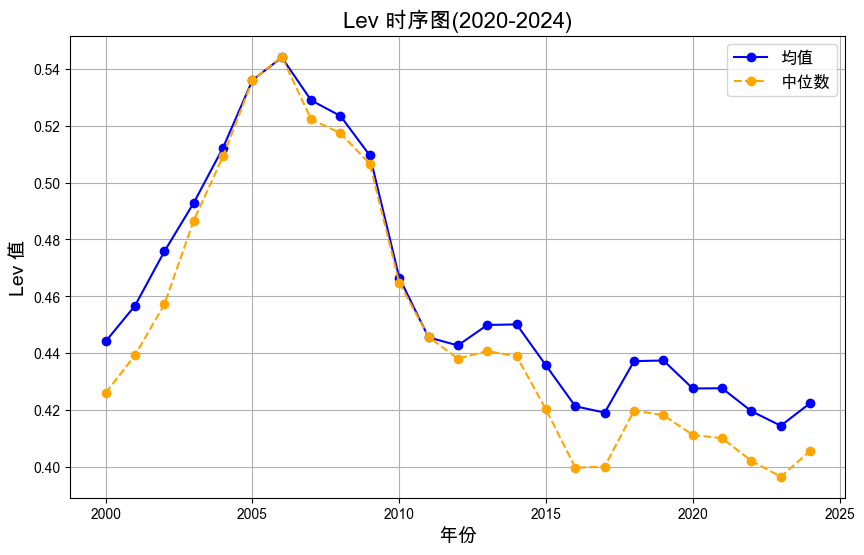

In [69]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti SC', 'PingFang SC', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 读取 Lev_stats 数据
lev_stats = pd.read_csv('output/Lev_stats.csv')

plt.figure(figsize=(10, 6))
plt.plot(lev_stats['时间'], lev_stats['mean'], label='均值', marker='o', linestyle='-', color='blue')
plt.plot(lev_stats['时间'], lev_stats['median'], label='中位数', marker='o', linestyle='--', color='orange')

plt.title('Lev 时序图(2020-2024)', fontsize=16)
plt.xlabel('年份', fontsize=14)
plt.ylabel('Lev 值', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('output/Lev_时序图.png', dpi=300)
plt.show()

* B2. 横轴为 年份，纵轴为 ROA 和 Cash 的均值

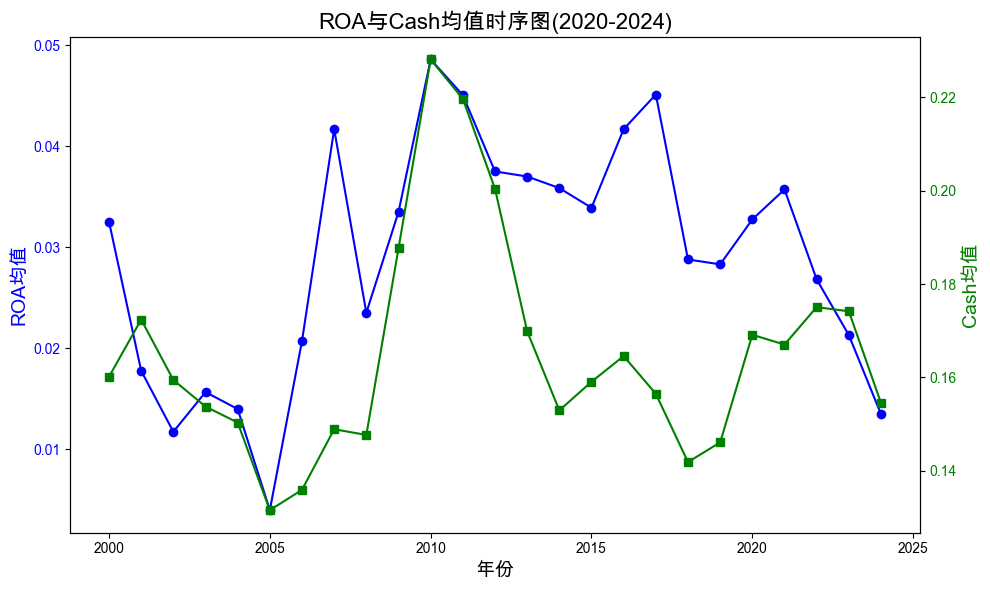

In [70]:
# 设置中文字体（适配Mac）
plt.rcParams['font.sans-serif'] = ['Heiti SC', 'PingFang SC', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
roa_stats = pd.read_csv('output/ROA_stats.csv')
cash_stats = pd.read_csv('output/Cash_stats.csv')

# 合并年份，确保年份一致
years = roa_stats['时间']

fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制ROA均值
ax1.plot(years, roa_stats['mean'], color='blue', marker='o', label='ROA均值')
ax1.set_xlabel('年份', fontsize=14)
ax1.set_ylabel('ROA均值', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# 创建第二个y轴，绘制Cash均值
ax2 = ax1.twinx()
ax2.plot(years, cash_stats['mean'], color='green', marker='s', label='Cash均值')
ax2.set_ylabel('Cash均值', color='green', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')

# 标题与图例
plt.title('ROA与Cash均值时序图(2020-2024)', fontsize=16)
fig.tight_layout()
plt.grid(True, axis='x')
plt.savefig('output/ROA_Cash_时序图.png', dpi=300)
plt.show()

#### C. 绘制时序图并作简要分析：
**待分析的行业：** 制造业 (C)，电力、热力、燃气及水生产和供应业 (D)，交通运输业 (G)，建筑业 (E)，房地产业 (K)，批发和零售业 (F) 以及 金融业 (J) 

In [71]:
industry_group = {
    'C': '制造业',
    'D': '电力、热力、燃气及水生产和供应业',
    'G': '交通运输业',
    'E': '建筑业',
    'K': '房地产业',
    'F': '批发和零售业',
    'J': '金融业'
}

- **算数平均负债率时序图**：绘制上述行业在自 2000 年至今各个年度的 年平均负债率 (Lev) 的时序图

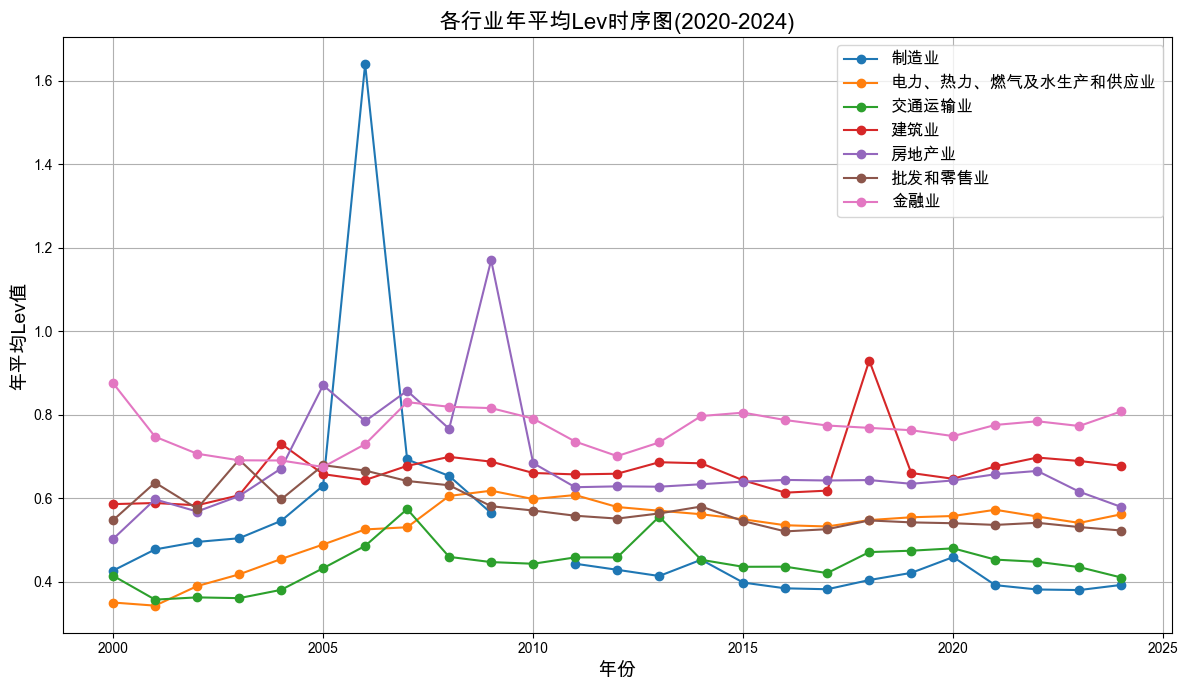

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 提取行业代码中的字母部分
indicators['行业字母'] = indicators['行业代码'].astype(str).str.extract(r'([A-Z])')

# 只保留属于industry_group的行业
industry_arlev_by_year = indicators[indicators['行业字母'].isin(industry_group.keys())].copy()

# 统计各行业各年度的年平均Lev值
industry_lev_stats = (
    industry_arlev_by_year
    .groupby(['时间', '行业字母'])['Lev']
    .mean()
    .reset_index()
)

# 行业字母转中文
industry_lev_stats['行业名称'] = industry_lev_stats['行业字母'].map(industry_group)

# 保存结果
industry_lev_stats.to_csv('output/industry_arlev_by_year.csv', index=False)

# 绘制时序图
plt.figure(figsize=(12, 7))
for code, name in industry_group.items():
    data = industry_lev_stats[industry_lev_stats['行业字母'] == code]
    plt.plot(data['时间'], data['Lev'], marker='o', label=name)

plt.title('各行业年平均Lev时序图(2020-2024)', fontsize=16)
plt.xlabel('年份', fontsize=14)
plt.ylabel('年平均Lev值', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('output/各行业年平均Lev时序图.png', dpi=300)
plt.show()


- **加权平均负债率时序图：**绘制上述行业在自 2000 年至今各个年度的 年加权平均负债率 (Lev) 的时序图，权重选择行业内每家公司的总资产

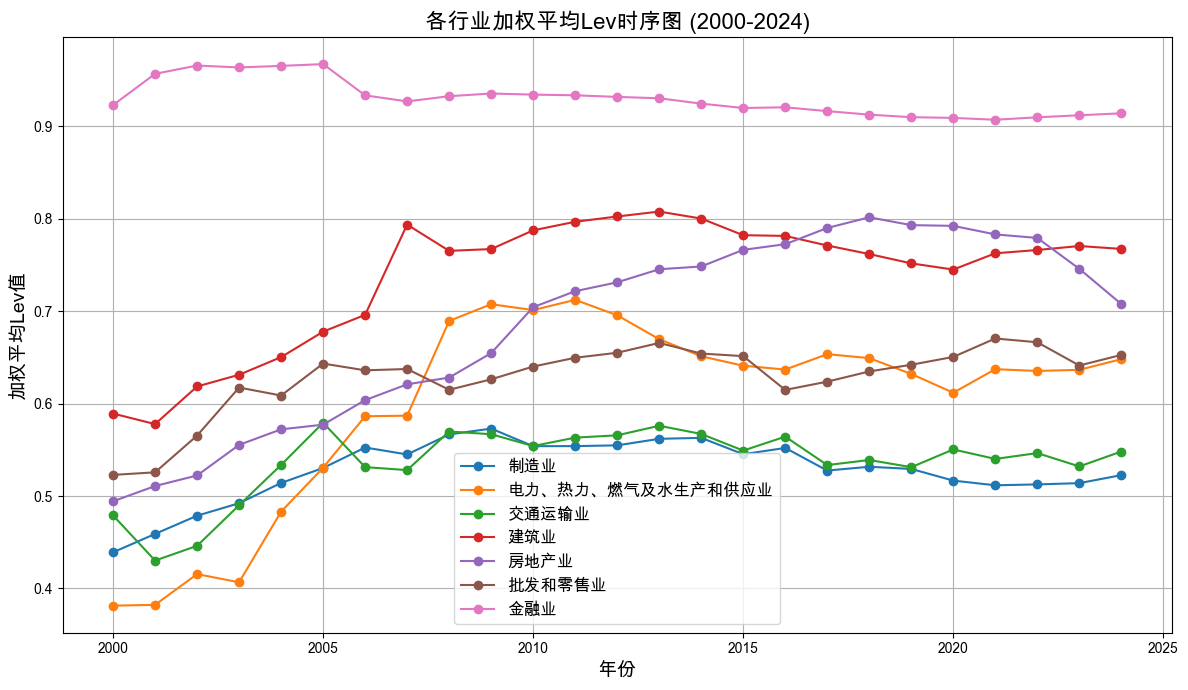

In [73]:
# 读取已缩尾处理的数据
indicators_winsorized = pd.read_csv('data_clean/indicators_winsorized.csv', dtype={'证券代码': str})

# 提取行业代码中的字母部分
indicators_winsorized['行业字母'] = indicators_winsorized['行业代码'].astype(str).str.extract(r'([A-Z])')

filtered_data = indicators_winsorized[
    (indicators_winsorized['行业字母'].isin(industry_group.keys())) &
    (indicators_winsorized['时间'] >= 2000) & (indicators_winsorized['时间'] <= 2024)
]

# 计算加权平均负债率 (Lev)，权重为总资产
weighted_lev = (
    filtered_data.groupby(['时间', '行业字母'])
    .apply(lambda x: (x['Lev'] * x['总资产']).sum() / x['总资产'].sum())
    .reset_index(name='加权平均Lev')
)

# 行业字母转中文
weighted_lev['行业名称'] = weighted_lev['行业字母'].map(industry_group)

# 保存结果
weighted_lev.to_csv('output/industry_weightedlev_by_year.csv', index=False)

# 绘制加权平均负债率时序图
plt.figure(figsize=(12, 7))
for code, name in industry_group.items():
    data = weighted_lev[weighted_lev['行业字母'] == code]
    plt.plot(data['时间'], data['加权平均Lev'], marker='o', label=name)

plt.title('各行业加权平均Lev时序图 (2000-2024)', fontsize=16)
plt.xlabel('年份', fontsize=14)
plt.ylabel('加权平均Lev值', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('output/各行业加权平均Lev时序图.png', dpi=300)
plt.show()

* **列表:** 呈现上述行业在 {2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023}年度的如下变量的平均值
    * SLoan, LLoan, Lev
    * Cash, ROA, ROE

In [77]:
# 读取缩尾处理后的数据
indicators = pd.read_csv('data_clean/indicators_winsorized.csv', dtype={'证券代码': str})

# 需要的年份
years = [2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023]

# 提取行业代码中的字母部分
indicators['行业字母'] = indicators['行业代码'].astype(str).str.extract(r'([A-Z])')

# 只保留指定行业和年份
filtered = indicators[
    (indicators['行业字母'].isin(industry_group.keys())) &
    (indicators['时间'].isin(years))
]

# 变量列表
vars_to_show = ['SLoan', 'LLoan', 'Lev', 'Cash', 'ROA', 'ROE']

# 分组聚合
result = (
    filtered.groupby(['时间', '行业字母'])[vars_to_show]
    .mean()
    .reset_index()
)

# 行业字母转中文
result['行业名称'] = result['行业字母'].map(industry_group)

# 调整列顺序
result = result[['时间','行业名称'] + vars_to_show]

# 按行业分别保存
for name in result['行业名称'].unique():
    df_ind = result[result['行业名称'] == name]
    df_ind.to_csv(f'output/{name}_年度指标分析.csv', index=False)

# 总表也保存
result.to_csv('output/行业年度均值列表.csv', index=False)

# 展示前几行
print(result.head())

     时间              行业名称     SLoan     LLoan       Lev      Cash       ROA  \
0  2001               制造业  0.172146  0.053447  0.442680  0.182836  0.018141   
1  2001  电力、热力、燃气及水生产和供应业  0.080644  0.090504  0.344225  0.150597  0.053151   
2  2001               建筑业  0.174406  0.040511  0.588493  0.162704  0.008544   
3  2001            批发和零售业  0.220469  0.032159  0.523009  0.152795  0.008498   
4  2001             交通运输业  0.101300  0.087389  0.357147  0.167707  0.044602   

        ROE  
0  0.025752  
1  0.084122  
2  0.013694  
3  0.027081  
4  0.066067  


#### D. 股权结构分析：
* 绘制箱线图
    * 横轴为 年份，纵轴为 Top1 的值。年份取值为：{2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023}。


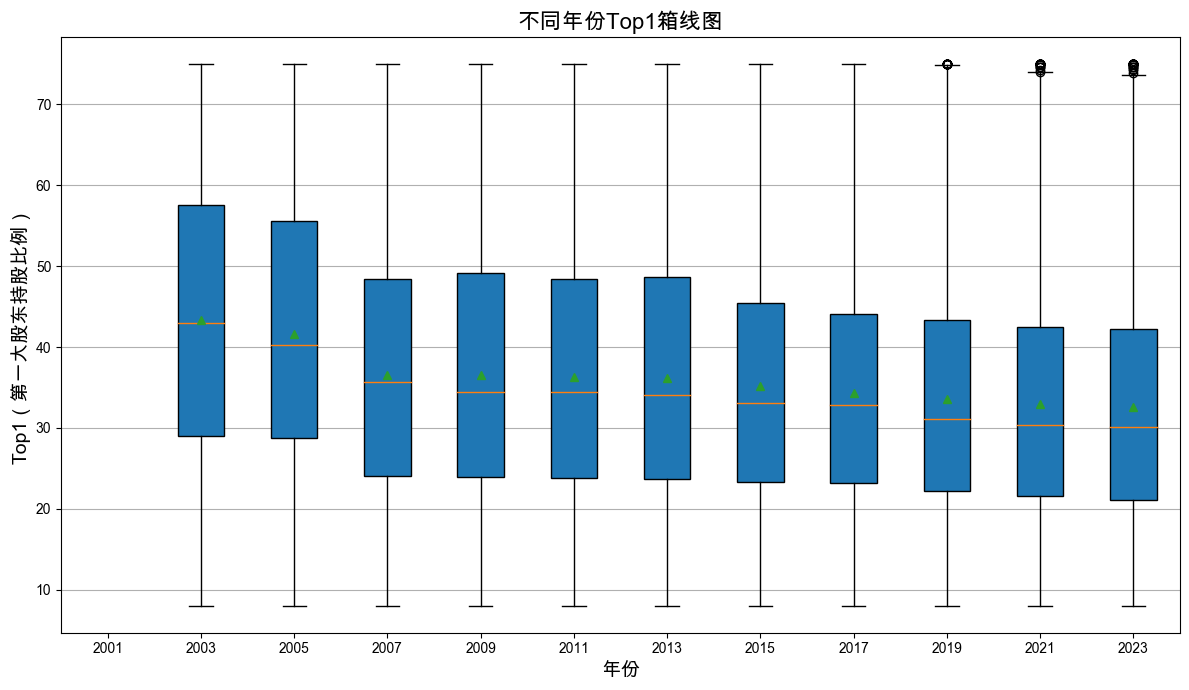

In [78]:
# 读取缩尾处理后的数据
indicators = pd.read_csv('data_clean/indicators_winsorized.csv', dtype={'证券代码': str})

# 指定年份
years = [2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023]

# 只保留指定年份的数据，且Top1非缺失
filtered = indicators[indicators['时间'].isin(years) & indicators['Top1'].notna()]

# 按年份准备数据
data = [filtered[filtered['时间'] == year]['Top1'] for year in years]

# 绘制箱线图
plt.figure(figsize=(12, 7))
plt.boxplot(data, labels=years, patch_artist=True, showmeans=True)
plt.xlabel('年份', fontsize=14)
plt.ylabel('Top1（第一大股东持股比例）', fontsize=14)
plt.title('不同年份Top1箱线图', fontsize=16)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('output/Top1_年份箱线图.png', dpi=300)
plt.show()